In [1]:
import pandas as pdhttp://localhost:8888/notebooks/Applied%20ML/Module4/Dimapasok-Module4.ipynb#
import matplotlib.pyplot as plt
import numpy as np


from sklearn.feature_extraction.text import TfidfVectorizer
fake= pd.read_csv("fake.csv")

fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [2]:
true= pd.read_csv("true.csv")
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [3]:
true['class'] = 1; fake['class'] = 0
df = pd.concat([fake, true])

X = TfidfVectorizer(stop_words='english', max_features=40
).fit_transform(df['title'])


In [4]:
y=df["class"].values.ravel()

y



array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [5]:
#Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#Declare Depth parameter for Random Forest
depth= [3, 6, 9, 12]
features= [3, 6, 9,  12, 15, 18]

FPR, TPR= [], []

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

for i in depth:
    for j in features:
        clf = RandomForestClassifier(max_depth=i, max_samples=j)
        classifier= clf.fit(X_train, y_train)
        y_pred= classifier.predict(X_test)
    
        acc= accuracy_score(y_test, y_pred)
        tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()
        
        TPR += [tp/(tp+fn)]  # Pd
        FPR += [fp/(fp+tn)]  # Pf
        
        print(f'{clf.score(X_test, y_test):8.3f} {i:11.5f} {j:10.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}')
        


   0.530     3.00000    3.00000  1.000  0.893
   0.664     3.00000    6.00000  0.999  0.637
   0.716     3.00000    9.00000  0.911  0.460
   0.724     3.00000   12.00000  0.855  0.393
   0.751     3.00000   15.00000  0.932  0.413
   0.741     3.00000   18.00000  0.830  0.340
   0.552     6.00000    3.00000  1.000  0.850
   0.685     6.00000    6.00000  0.948  0.551
   0.695     6.00000    9.00000  0.994  0.575
   0.751     6.00000   12.00000  0.872  0.357
   0.755     6.00000   15.00000  0.923  0.396
   0.733     6.00000   18.00000  0.977  0.486
   0.569     9.00000    3.00000  0.979  0.799
   0.678     9.00000    6.00000  0.999  0.612
   0.709     9.00000    9.00000  0.982  0.537
   0.726     9.00000   12.00000  0.854  0.388
   0.748     9.00000   15.00000  0.953  0.436
   0.749     9.00000   18.00000  0.974  0.453
   0.676    12.00000    3.00000  0.977  0.595
   0.702    12.00000    6.00000  0.785  0.373
   0.709    12.00000    9.00000  0.927  0.487
   0.737    12.00000   12.00000  0

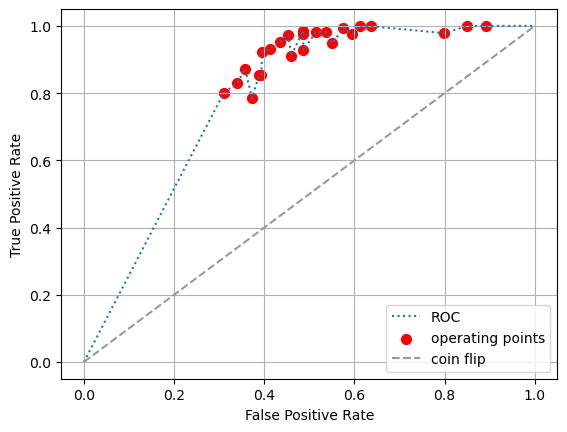

In [6]:
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()




In [7]:
#Decision Tree
#Also use max depth and max features

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Declare Depth parameter for Random Forest
depth= [3, 6, 9, 12]
features= [3, 6, 9,  12, 15, 18]

tree_FPR, tree_TPR= [], []
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

for i in depth:
    for j in features:
        tree = DecisionTreeClassifier(max_depth=i, min_samples_leaf= j)
        tree_classifier= tree.fit(X_train, y_train)
        y_pred= tree_classifier.predict(X_test)
    
        acc= accuracy_score(y_test, y_pred)
        tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()
        
        tree_TPR += [tp/(tp+fn)]  # Pd
        tree_FPR += [fp/(fp+tn)]  # Pf
        
        print(f'{tree.score(X_test, y_test):8.3f} {i:11.5f} {j:10.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}')

   0.713     3.00000    3.00000  1.000  0.893
   0.713     3.00000    6.00000  1.000  0.893
   0.713     3.00000    9.00000  1.000  0.893
   0.713     3.00000   12.00000  1.000  0.893
   0.713     3.00000   15.00000  1.000  0.893
   0.713     3.00000   18.00000  1.000  0.893
   0.746     6.00000    3.00000  1.000  0.893
   0.746     6.00000    6.00000  1.000  0.893
   0.746     6.00000    9.00000  1.000  0.893
   0.745     6.00000   12.00000  1.000  0.893
   0.745     6.00000   15.00000  1.000  0.893
   0.745     6.00000   18.00000  1.000  0.893
   0.770     9.00000    3.00000  1.000  0.893
   0.770     9.00000    6.00000  1.000  0.893
   0.770     9.00000    9.00000  1.000  0.893
   0.769     9.00000   12.00000  1.000  0.893
   0.769     9.00000   15.00000  1.000  0.893
   0.769     9.00000   18.00000  1.000  0.893
   0.783    12.00000    3.00000  1.000  0.893
   0.783    12.00000    6.00000  1.000  0.893
   0.783    12.00000    9.00000  1.000  0.893
   0.781    12.00000   12.00000  1

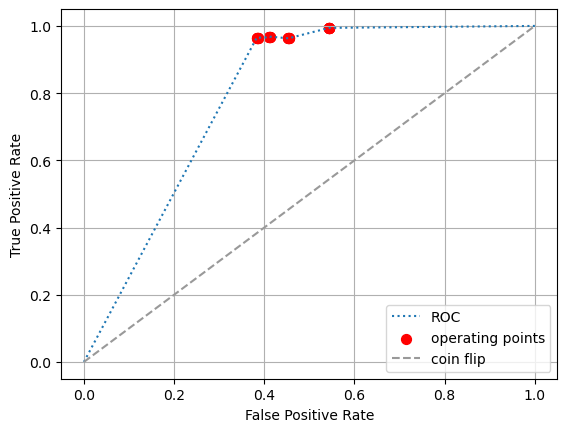

In [8]:
#Decision Tree

tree_FPR, tree_TPR = zip(*sorted(zip(tree_FPR, tree_TPR)))
tree_fpr = [0.]+list(tree_FPR)+[1.]; tree_tpr = [0.]+list(tree_TPR)+[1.]

# Plot
fig, ax = plt.subplots()

plt.plot(tree_fpr, tree_tpr, ':', label='ROC')
plt.scatter(tree_FPR, tree_TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [9]:
#Neural Network Classifier 

from sklearn.neural_network import MLPClassifier

mlp_FPR, mlp_TPR= [], []
layer_size= [1,3, 5,7, 9]
lr= ["constant", "invscaling", "adaptive"]
for i in layer_size:
    for j in lr:
        X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)
        mlp = MLPClassifier(hidden_layer_sizes= layer_size, learning_rate= j, random_state=42)
        mlp_classifier= mlp.fit(X_train, y_train)
        y_pred= mlp_classifier.predict(X_test)
    
        acc= accuracy_score(y_test, y_pred)
        tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()
        
        mlp_TPR += [tp/(tp+fn)]  # Pd
        mlp_FPR += [fp/(fp+tn)]  # Pf
        
        print(f'{mlp.score(X_test, y_test):8.3f} {i:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}')


   0.803     1.00000  1.000  0.893
   0.803     1.00000  1.000  0.893
   0.798     1.00000  1.000  0.893
   0.802     3.00000  1.000  0.893
   0.807     3.00000  1.000  0.893
   0.806     3.00000  1.000  0.893
   0.805     5.00000  1.000  0.893
   0.811     5.00000  1.000  0.893
   0.805     5.00000  1.000  0.893
   0.804     7.00000  1.000  0.893
   0.805     7.00000  1.000  0.893
   0.805     7.00000  1.000  0.893
   0.803     9.00000  1.000  0.893
   0.809     9.00000  1.000  0.893
   0.808     9.00000  1.000  0.893


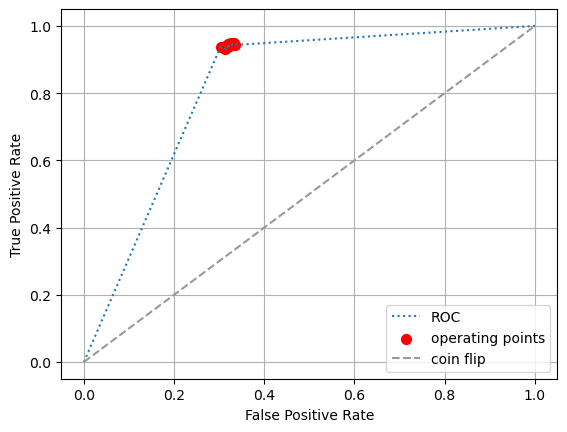

In [10]:
#Neural Network

mlp_FPR, mlp_TPR = zip(*sorted(zip(mlp_FPR, mlp_TPR)))
mlp_fpr = [0.]+list(mlp_FPR)+[1.]; mlp_tpr = [0.]+list(mlp_TPR)+[1.]

# Plot
fig, ax = plt.subplots()

plt.plot(mlp_fpr, mlp_tpr, ':', label='ROC')
plt.scatter(mlp_FPR, mlp_TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [11]:
#4 Setting up with Text column in features

true['class'] = 0; fake['class'] = 1
df = pd.concat([fake, true])

new_X = TfidfVectorizer(stop_words='english', max_features=40
).fit_transform(df['text'])


In [12]:
#Random Forest with new X
depth= [3, 6, 9, 12]
features= [3, 6, 9,  12, 15, 18]

FPR, TPR= [], []

X_train, X_test, y_train, y_test= train_test_split(new_X, y, test_size= 0.2)

for i in depth:
    for j in features:
        clf = RandomForestClassifier(max_depth=i, max_samples=j)
        classifier= clf.fit(X_train, y_train)
        y_pred= classifier.predict(X_test)
    
        acc= accuracy_score(y_test, y_pred)
        tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()
        
        TPR += [tp/(tp+fn)]  # Pd
        FPR += [fp/(fp+tn)]  # Pf
        
        print(f'{clf.score(X_test, y_test):8.3f} {i:11.5f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}')

   0.931     3.00000  0.884  0.027
   0.968     3.00000  0.969  0.032
   0.954     3.00000  0.929  0.025
   0.983     3.00000  0.976  0.012
   0.982     3.00000  0.983  0.020
   0.982     3.00000  0.974  0.010
   0.776     6.00000  0.633  0.097
   0.950     6.00000  0.914  0.019
   0.953     6.00000  0.907  0.006
   0.968     6.00000  0.957  0.022
   0.983     6.00000  0.975  0.010
   0.988     6.00000  0.986  0.009
   0.903     9.00000  0.821  0.025
   0.933     9.00000  0.866  0.008
   0.968     9.00000  0.952  0.018
   0.976     9.00000  0.957  0.007
   0.979     9.00000  0.967  0.011
   0.985     9.00000  0.979  0.010
   0.837    12.00000  0.740  0.078
   0.965    12.00000  0.960  0.031
   0.969    12.00000  0.962  0.024
   0.970    12.00000  0.948  0.010
   0.981    12.00000  0.973  0.012
   0.987    12.00000  0.988  0.014


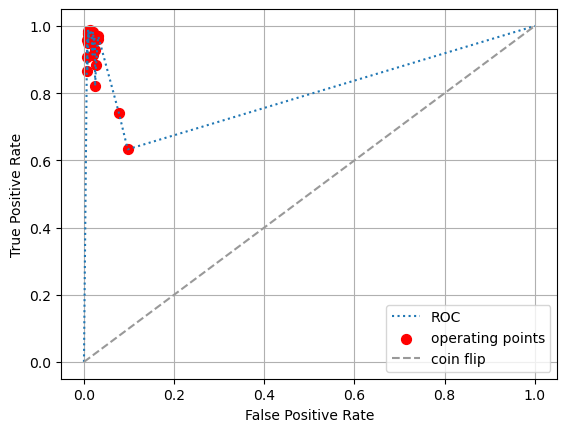

In [13]:
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

